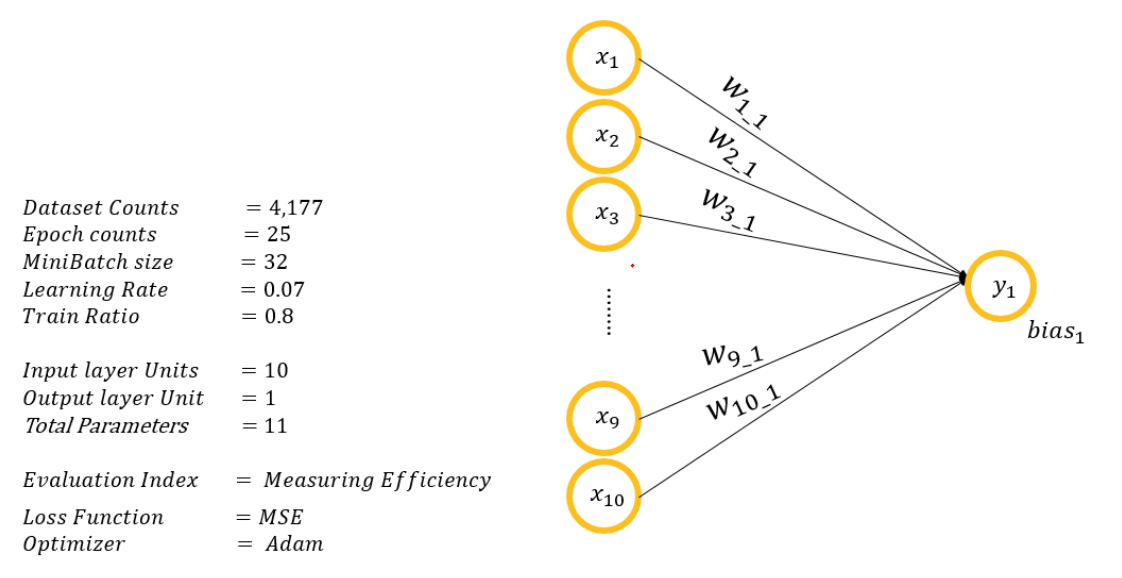

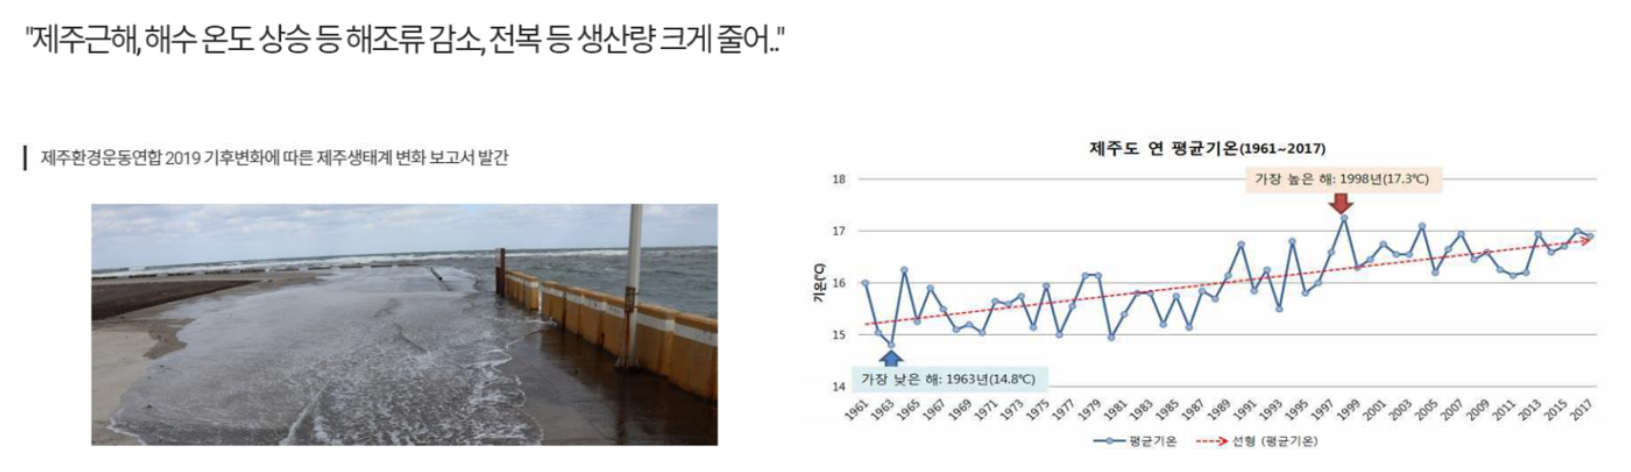

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/abalone_mini.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             10 non-null     object 
 1   Length          10 non-null     float64
 2   Diameter        10 non-null     float64
 3   Height          10 non-null     float64
 4   Whole weight    10 non-null     float64
 5   Shucked weight  10 non-null     float64
 6   Viscera weight  10 non-null     float64
 7   Shell weight    10 non-null     float64
 8   Rings           10 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 848.0+ bytes


# 데이터 불러오기 
# 데이터 분할하기 ( 독립과 종속 / 학습과 테스트 )
# 파라미터 생성하기 
# 신경망 연산 
# 역전파 연산 
# 성능 체크 

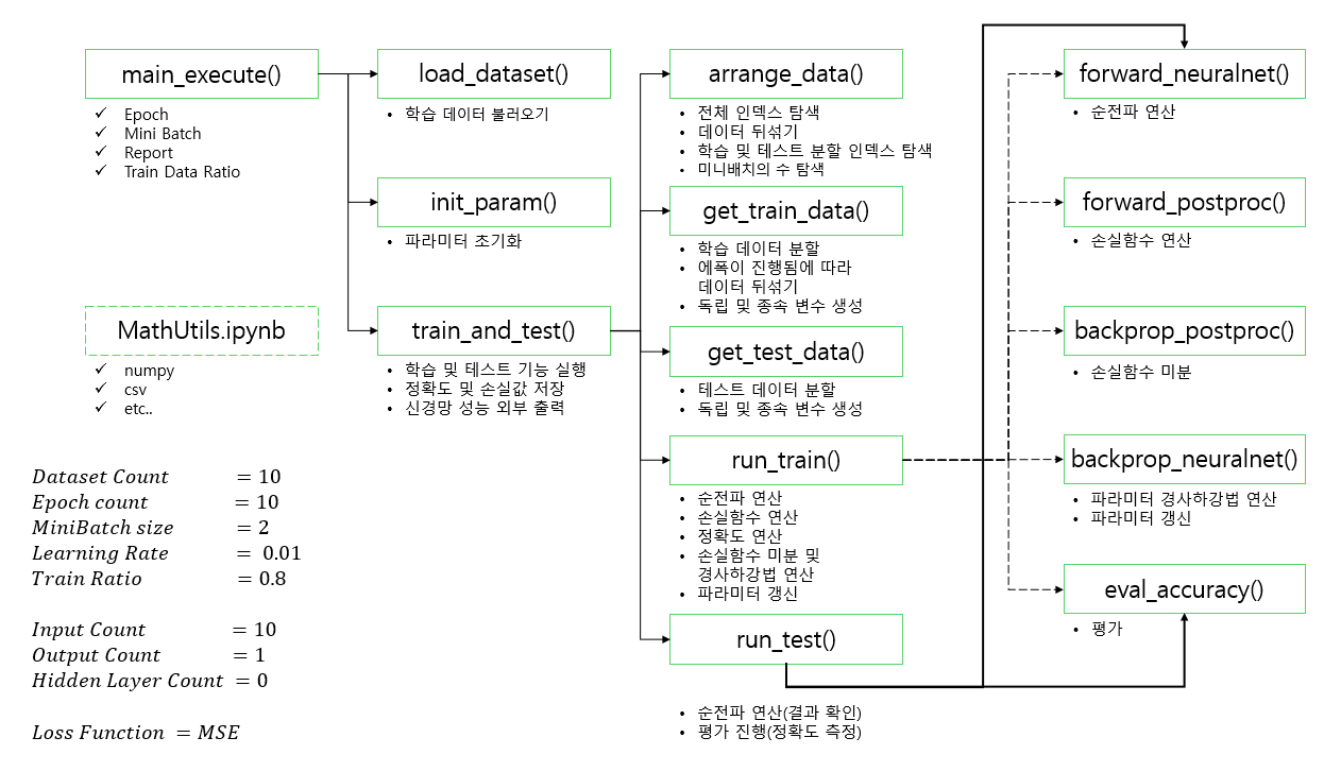

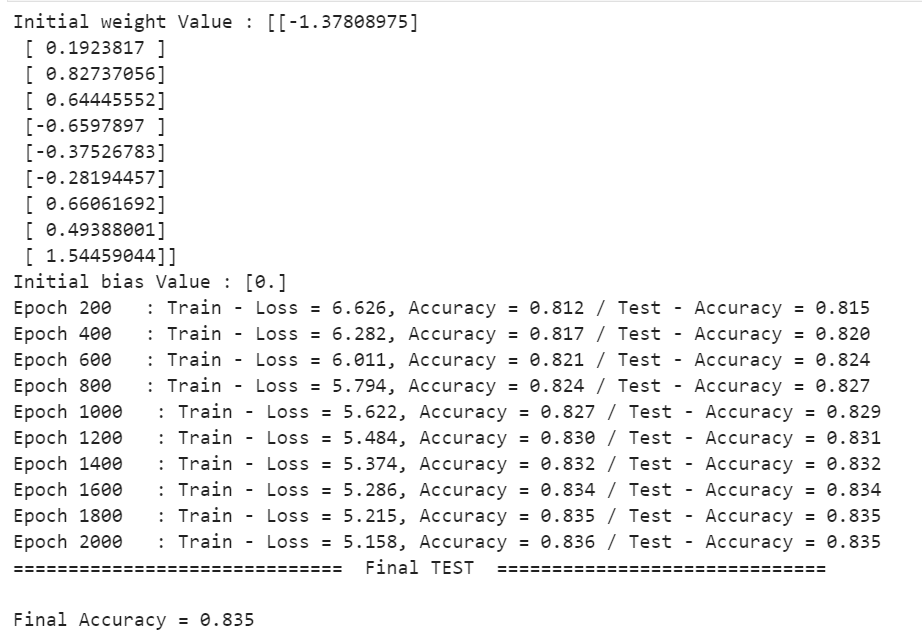

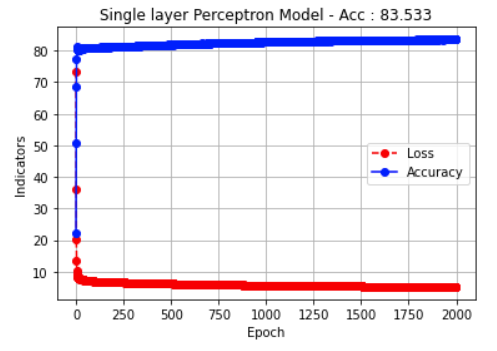

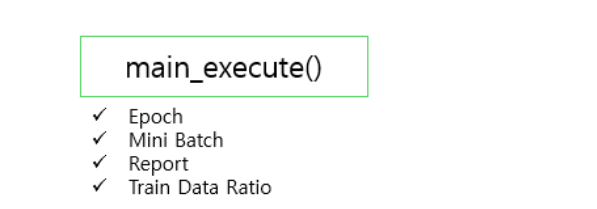

In [1]:
def main_execute(epoch_count = 10, mb_size = 2, report = 2, train_ratio = 0.8):
    load_dataset()
    weight_initial, bias_initial = init_param()
    losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count,
                                                               mb_size, 
                                                               report, 
                                                               train_ratio)

    return weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc

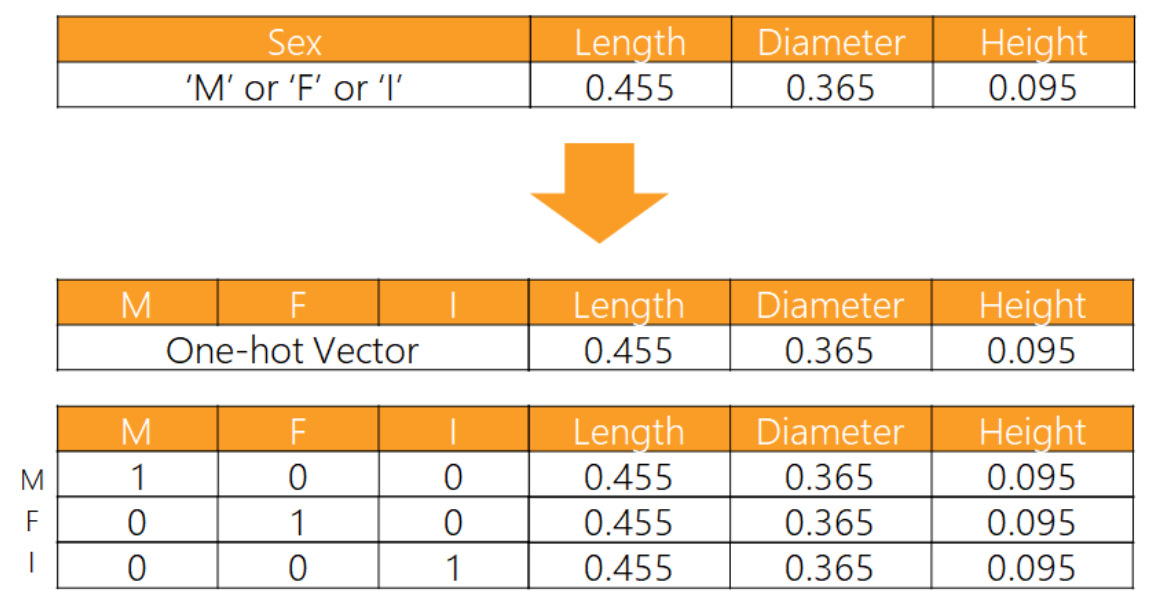

In [2]:
def load_dataset():
    with open('/content/abalone.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 10, 1
    data = np.zeros([ len(rows), input_cnt + output_cnt])
    
    for n, row in enumerate(rows):
        if row[0] == 'M' : data[n, 0] = 1
        if row[0] == 'F' : data[n, 1] = 1
        if row[0] == 'I' : data[n, 2] = 1
        data[n, 3: ] = row[1:]

In [3]:
%run /content/MathUtils.ipynb

load_dataset()

In [4]:
print(data)

[[ 1.      0.      0.     ...  0.101   0.15   15.    ]
 [ 1.      0.      0.     ...  0.0485  0.07    7.    ]
 [ 0.      1.      0.     ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.      0.     ...  0.2875  0.308   9.    ]
 [ 0.      1.      0.     ...  0.261   0.296  10.    ]
 [ 1.      0.      0.     ...  0.3765  0.495  12.    ]]


In [5]:
print(data.shape)

(4177, 11)


In [6]:
def init_param():
    global weight, bias 

    weight_initial = []
    bias_initial   = []
    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])
    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}".format(bias))
    weight_initial.append(weight)
    bias_initial.append(bias)

    return weight_initial, bias_initial

In [7]:
weight_initial, bias_initial = init_param()

Initial Weight Value : 
[[-0.00461063]
 [ 0.02640508]
 [ 0.02827534]
 [ 0.00376269]
 [ 0.00574629]
 [ 0.00724118]
 [-0.00482619]
 [-0.01077227]
 [-0.0233075 ]
 [-0.01399406]]
Initial Bias Value : 
[0.]


In [ ]:
def train_and_test():
    pass

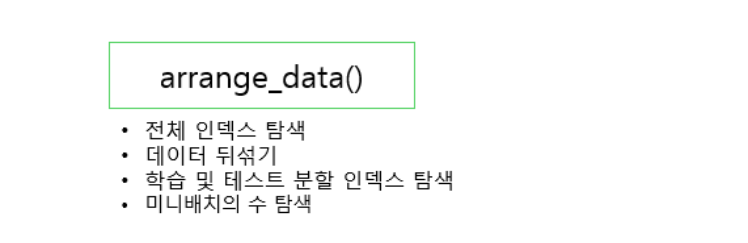

In [8]:
def arrange_data(mb_size, train_ratio):
    
    global shuffle_map, test_begin_index

    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size
    test_begin_index = mini_batch_step_count * mb_size
    return mini_batch_step_count

In [11]:
mini_batch_step_count = arrange_data(mb_size = 10, train_ratio = 0.8)

In [13]:
print("mini_batch_step_count : ", mini_batch_step_count)
print("shuffle_map :", shuffle_map[:10])
print("test_begin_index : ", test_begin_index)

mini_batch_step_count :  334
shuffle_map : [1132  259  360  247 2130 2241 3362  111 3394 3853]
test_begin_index :  3340


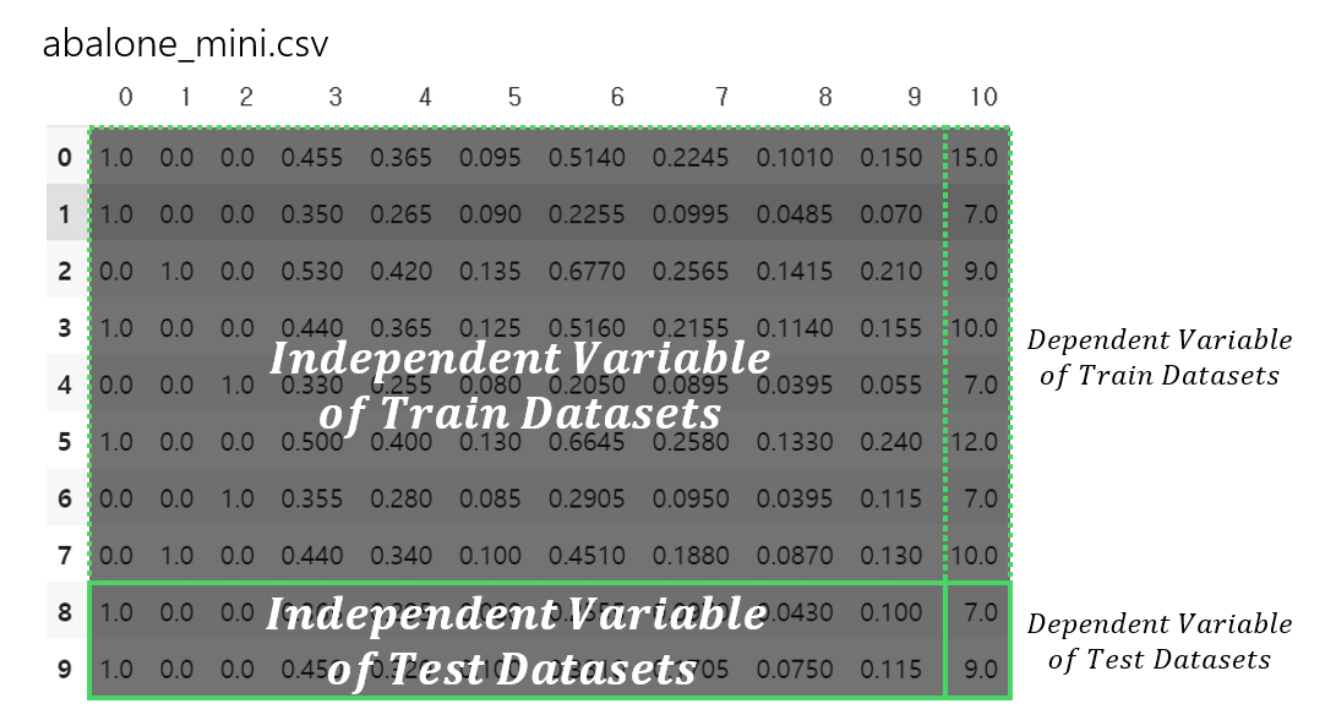

In [14]:
def get_test_data():
    test_data = data[shuffle_map[test_begin_index:]]
    return test_data[ : , : -output_cnt], test_data[ : , -output_cnt : ]

In [ ]:
test_x, test_y = get_test_data()
print(test_x)
print("==========================================")
print(test_y)

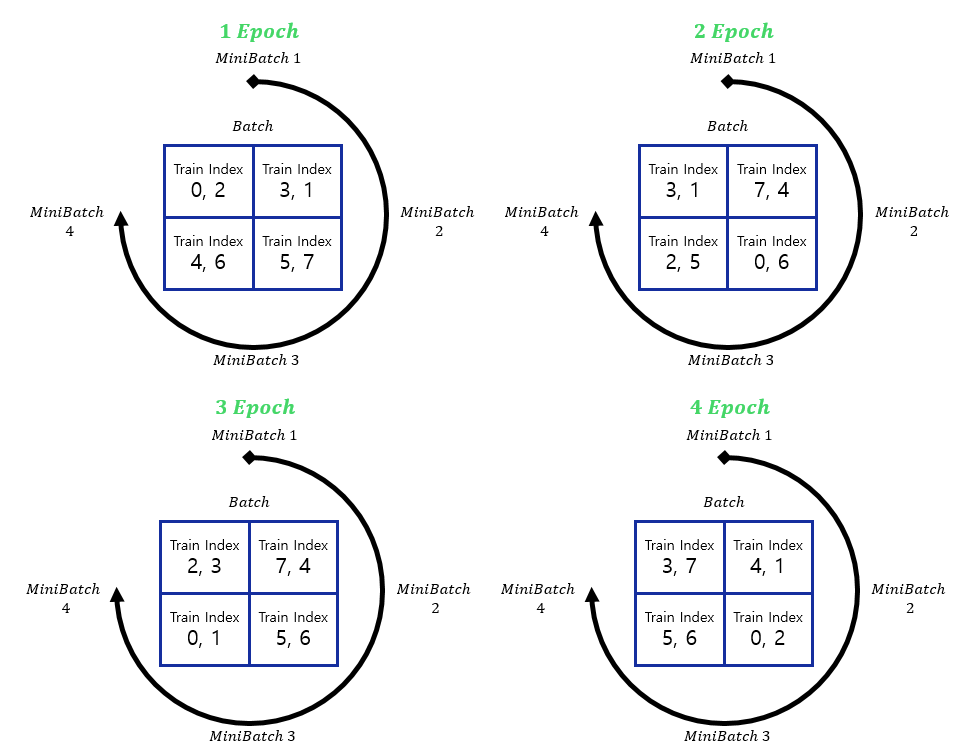

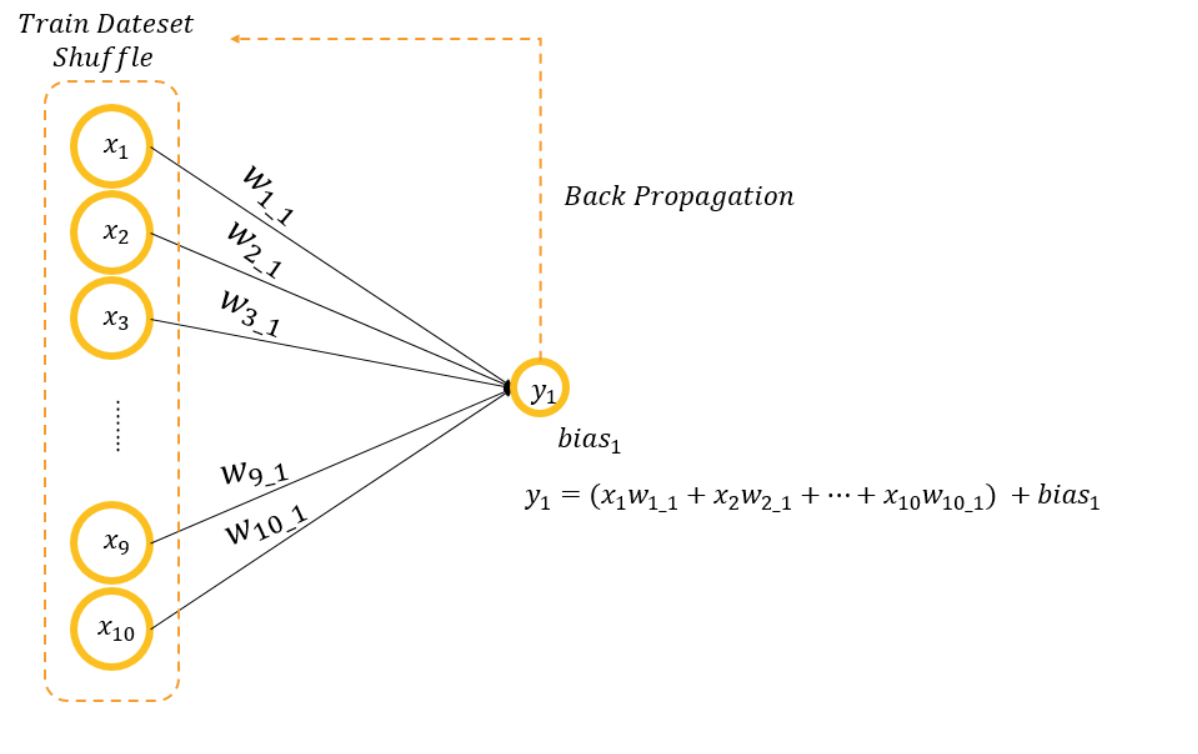

In [16]:
def get_train_data(mb_size, n):
    if n == 0:
        np.random.shuffle(shuffle_map[:test_begin_index])

    train_data = data[shuffle_map[mb_size * n : mb_size * (n+1) ]]

    return train_data[ : , : -output_cnt], train_data[ : , -output_cnt : ]
    

In [18]:
train_x, train_y = get_train_data(mb_size = 10, n = 0)
print(train_x)
print("=================================")
print(train_y)

[[0.     0.     1.     0.585  0.45   0.15   0.8915 0.3975 0.2035 0.253 ]
 [1.     0.     0.     0.34   0.265  0.085  0.1835 0.077  0.046  0.065 ]
 [0.     1.     0.     0.525  0.43   0.165  0.717  0.289  0.1745 0.195 ]
 [0.     0.     1.     0.54   0.42   0.14   0.7265 0.3205 0.1445 0.229 ]
 [0.     0.     1.     0.495  0.4    0.105  0.602  0.2505 0.1265 0.19  ]
 [0.     1.     0.     0.69   0.54   0.185  1.5715 0.6935 0.318  0.47  ]
 [1.     0.     0.     0.67   0.5    0.19   1.519  0.616  0.388  0.415 ]
 [0.     1.     0.     0.53   0.395  0.115  0.5685 0.249  0.1375 0.161 ]
 [0.     0.     1.     0.295  0.215  0.085  0.128  0.049  0.034  0.04  ]
 [1.     0.     0.     0.46   0.35   0.125  0.5165 0.1885 0.1145 0.185 ]]
[[ 8.]
 [10.]
 [10.]
 [ 9.]
 [ 8.]
 [15.]
 [10.]
 [ 9.]
 [ 6.]
 [ 9.]]


In [ ]:
mb_size = 2 

mini_1 = data[shuffle_map[ 0 : 2 ]]
mini_2 = data[shuffle_map[ 2 : 4 ]]
mini_3 = data[shuffle_map[ 4 : 6 ]]
mini_4 = data[shuffle_map[ 6 : 8 ]]

mini_n = data[shuffle_map[ mb_size * 0 : mb_size * (0+1) ]]
mini_n = data[shuffle_map[ mb_size * 1 : mb_size * (1+1) ]]
mini_n = data[shuffle_map[ mb_size * 2 : mb_size * (2+1) ]]
mini_n = data[shuffle_map[ mb_size * 3 : mb_size * (3+1) ]]

mini_n = data[shuffle_map[ mb_size * n : mb_size * (n+1) ]]

In [21]:
def run_test(x, y):
    accuracy = 100 
    return accuracy

run_test(0,0)

100

In [20]:
def run_train(x, y):
    loss = 0
    accuracy = 95
    return loss, accuracy

run_train(0, 0)

(0, 95)

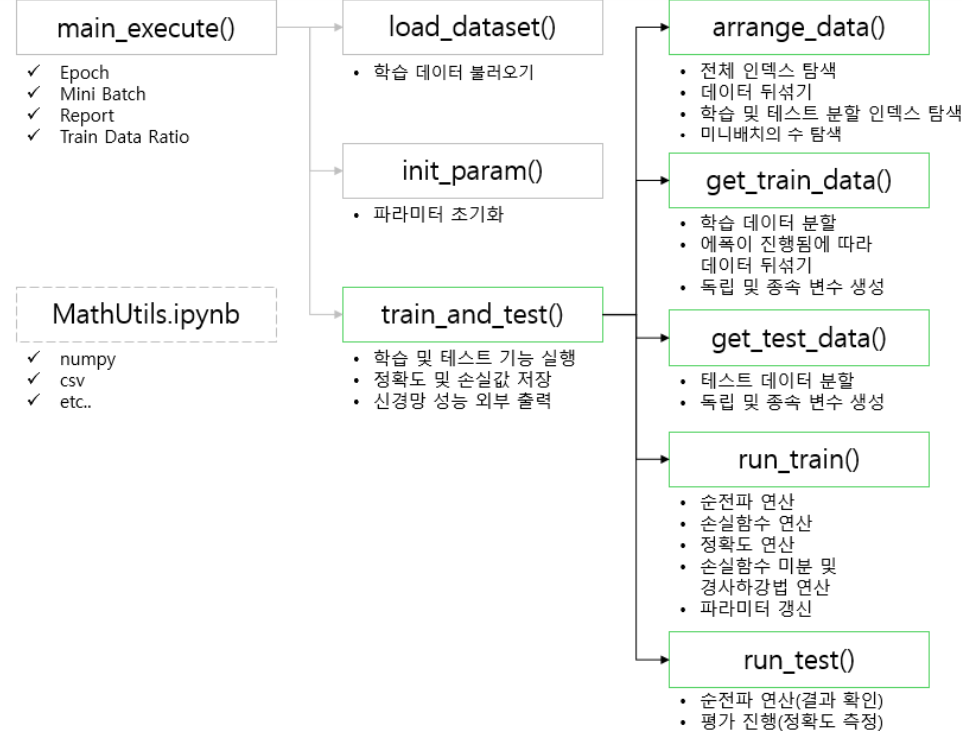

In [ ]:
epoch_count = 10
report      = 4

for epoch in range(epoch_count):
    print((epoch + 1) % report == 0)

False
False
False
True
False
False
False
True
False
False


In [19]:
def train_and_test(epoch_count, mb_size, report, train_ratio):
    mini_batch_step_count = arrange_data(mb_size, train_ratio)
    test_x, test_y = get_test_data()

    losses_mean_row = []
    accs_mean_row   = []

    for epoch in range(epoch_count):
        losses = []
        accs   = [] 
        for n in range(mini_batch_step_count):
            train_x, train_y = get_train_data(mb_size, n)
            loss, acc= run_train(train_x, train_y)
            losses.append(loss)
            accs.append(acc)

        if report > 0 and (epoch + 1) % report == 0:
            acc = run_test(test_x, test_y)
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f}  / Test - Accuracy = {:.3f}".\
                  format(epoch + 1, np.mean(losses), np.mean(accs), acc))
            
        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs) * 100

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)

    final_acc = run_test(test_x, test_y)        
    print("=" * 35, "Final TEST", "=" * 35)
    print("\nFinal Accuracy : {:.3f}".format(final_acc))

    return losses_mean_row, accs_mean_row, final_acc


In [23]:
losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count = 100,
                                                           mb_size = 2,
                                                           report = 1,
                                                           train_ratio = 0.8)

Epoch 1 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 2 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 3 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 4 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 5 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 6 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 7 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 8 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 9 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 10 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 11 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 12 : Train - Loss = 0.000, Accuracy = 95.000  / Test - Accuracy = 100.000
Epoch 13 : Train - Loss = 0.000, Accuracy = 95.00

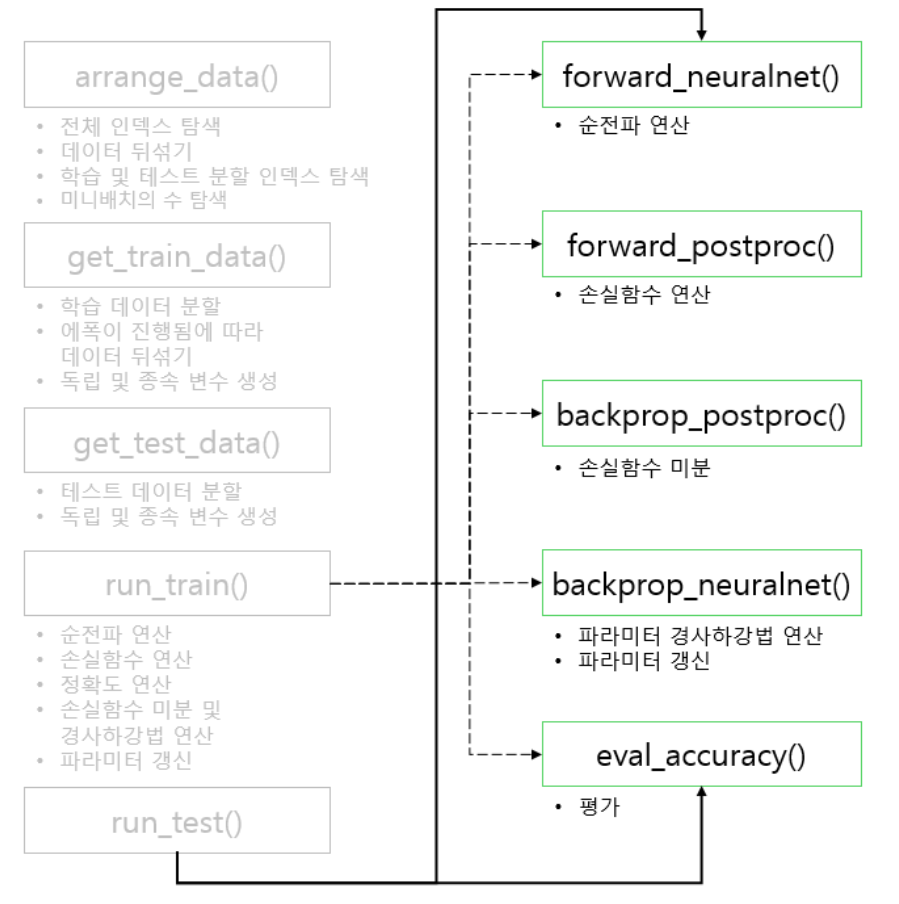

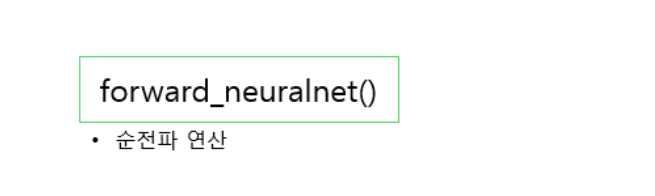

In [24]:
def forward_neuralnet(x):
    y_hat = np.matmul(x, weight) + bias
    return y_hat, x

In [25]:
y_hat, _ = forward_neuralnet(train_x)
print(y_hat)
print(y_hat.shape)

[[ 0.01728043]
 [-0.00488987]
 [ 0.01867663]
 [ 0.02020309]
 [ 0.02198562]
 [ 0.00440004]
 [-0.0266582 ]
 [ 0.02061802]
 [ 0.02873848]
 [-0.00974435]]
(10, 1)


In [26]:
print(train_x.shape)

(10, 10)


In [27]:
weight.shape

(10, 1)

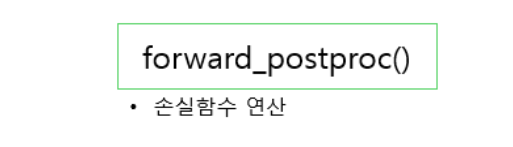

In [28]:
def forward_postproc(y_hat, y):   
    diff   = y_hat - y
    square = np.square(diff)
    loss   = np.mean(square)
    return loss, diff

In [55]:
loss, _ = forward_postproc(y_hat, train_y)
print("MSE : ", loss )

MSE :  93.05965662178632


In [ ]:
train_y

array([[7.],
       [7.]])

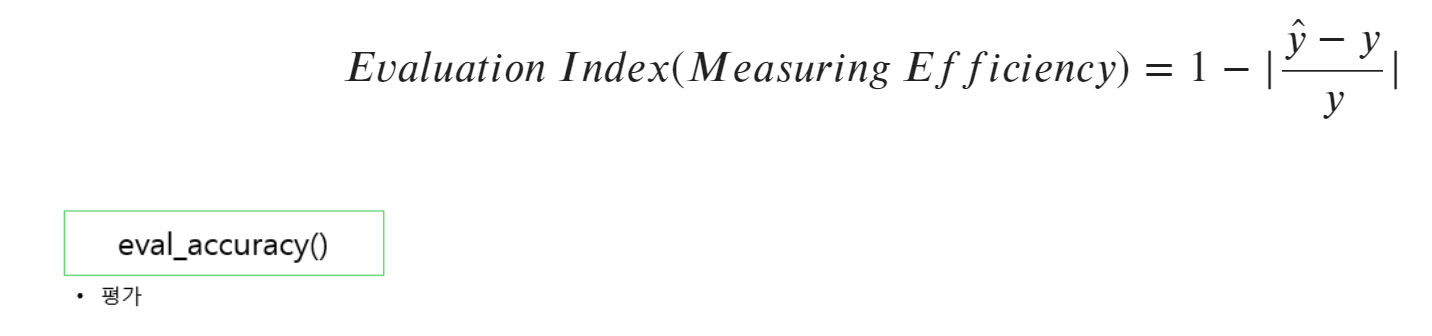

In [37]:
result = np.abs((y_hat - train_y) / train_y)
print(result)

print("======================================")
result_mean = np.mean(np.abs((y_hat - train_y) / train_y))
print(result_mean)

[[0.99783995]
 [1.00048899]
 [0.99813234]
 [0.99775521]
 [0.9972518 ]
 [0.99970666]
 [1.00266582]
 [0.99770911]
 [0.99521025]
 [1.00108271]]
0.998784283202124


In [30]:
def eval_accuracy(y_hat, y):
    mdiff = np.mean(np.abs((y_hat - y) / y))
    return 1 - mdiff 

In [31]:
acc = eval_accuracy(y_hat, train_y)
print("ACC : {:.3f}".format(acc * 100))

ACC : 0.122


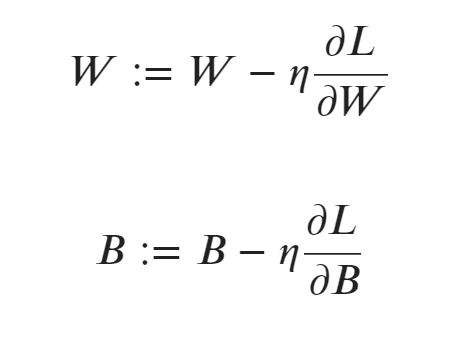

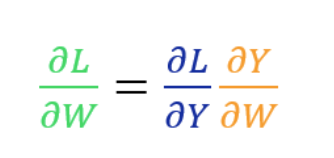

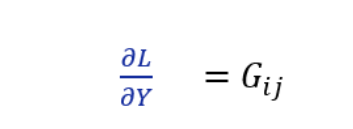

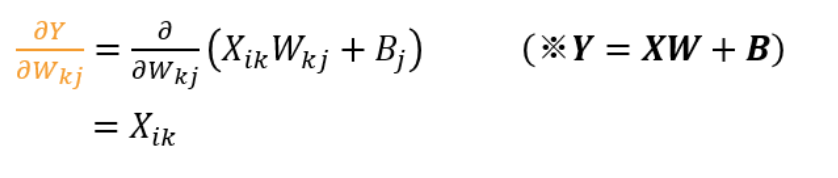

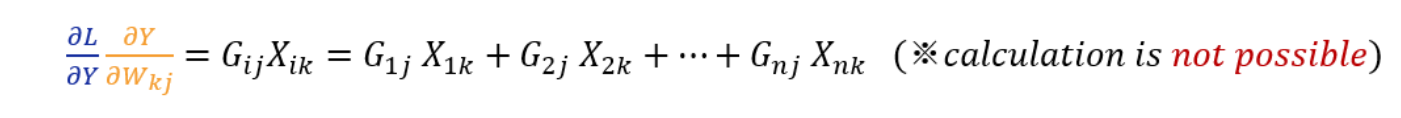

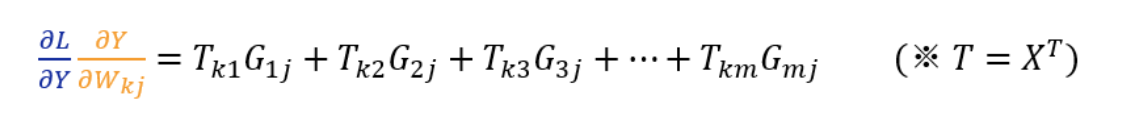

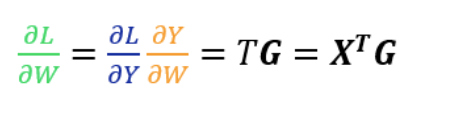

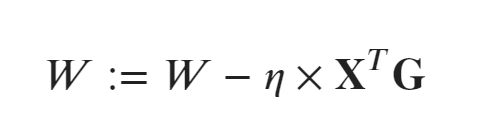

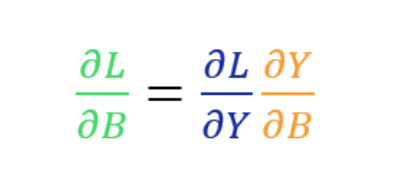

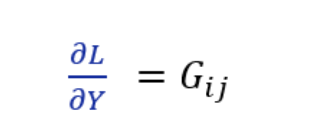

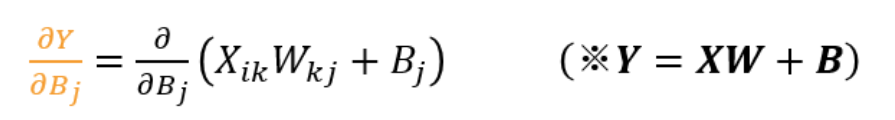

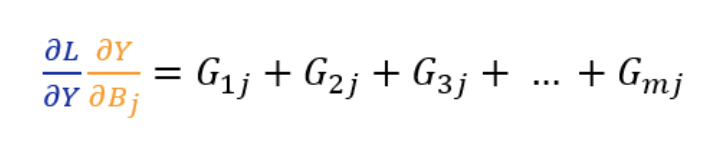

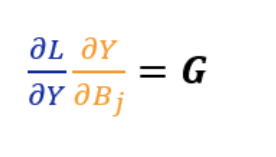

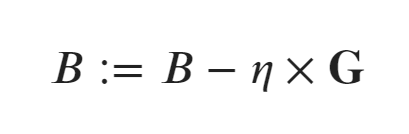

In [49]:
def backprop_neuralnet(G_output, x):
    global weight, bias 

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)
    
    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w
    bias   -= LEARNING_RATE * G_b

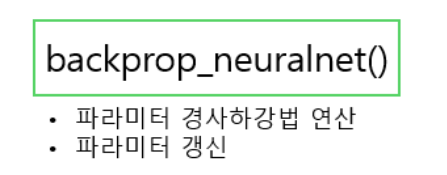

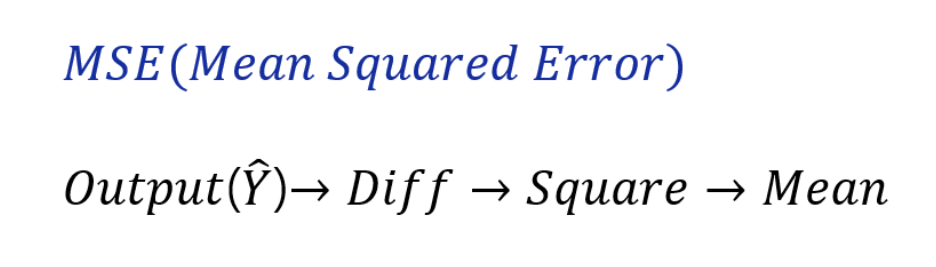

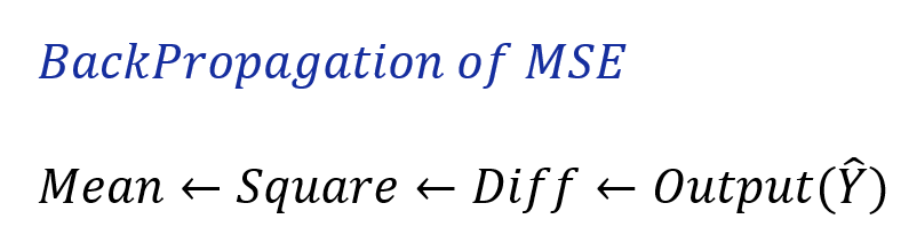

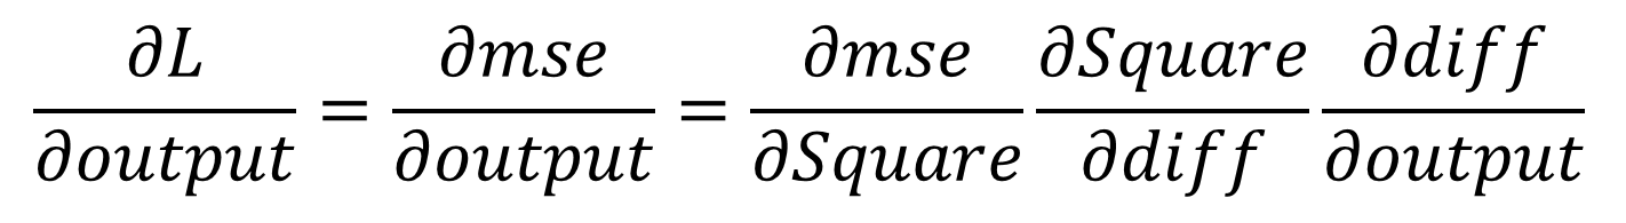

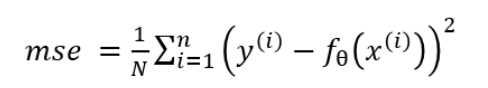

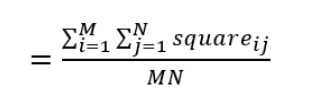

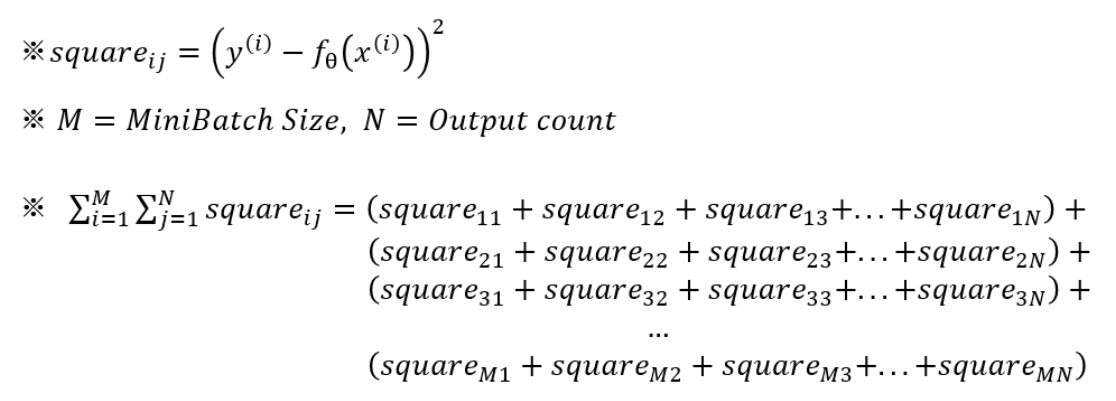

In [57]:
diff   = y_hat - train_y
square = np.square(diff)
print("square : \n", square)

print("diff.shape :", diff.shape)

row_count_M = diff.shape[0]
col_count_N = diff.shape[1]

print("row_count_M : ", row_count_M)
print("col_count_N : ", col_count_N)

mse = (square[0][0] + 
       square[1][0] + 
       square[2][0] + 
       square[3][0] + 
       square[4][0] + 
       square[5][0] +
       square[6][0] + 
       square[7][0] + 
       square[8][0] + 
       square[9][0]) / (row_count_M * col_count_N)
print("MSE : ", mse)

square : 
 [[ 63.7238118 ]
 [100.09782141]
 [ 99.62681615]
 [ 80.63675255]
 [ 63.64871338]
 [224.86801819]
 [100.53387461]
 [ 80.62930069]
 [ 35.65596418]
 [ 81.17549325]]
diff.shape : (10, 1)
row_count_M :  10
col_count_N :  1
MSE :  93.05965662178632


In [52]:
print(square[0][0])
print(square[1][0])
print(square[2][0])
print(square[3][0])
print(square[9][0])

63.72381180395437
100.09782140582305
99.62681615456593
80.63675255348579
81.17549324653838


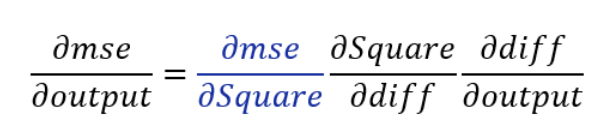

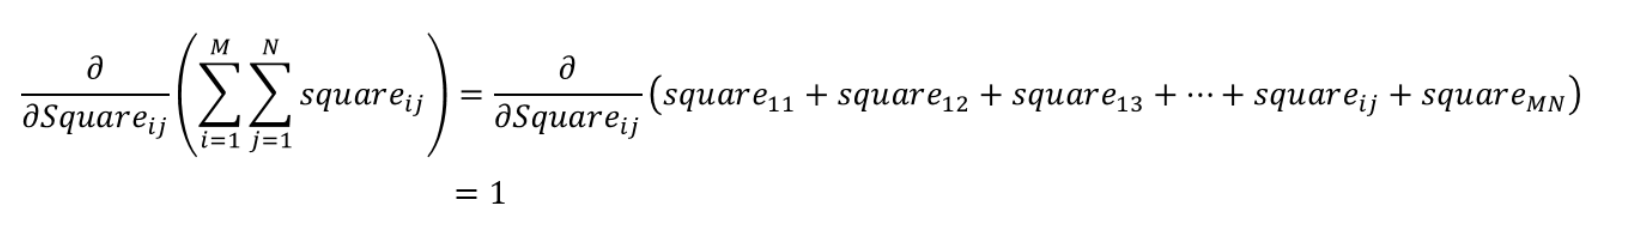

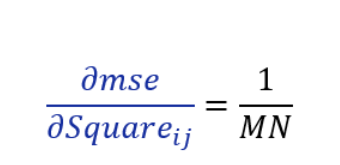

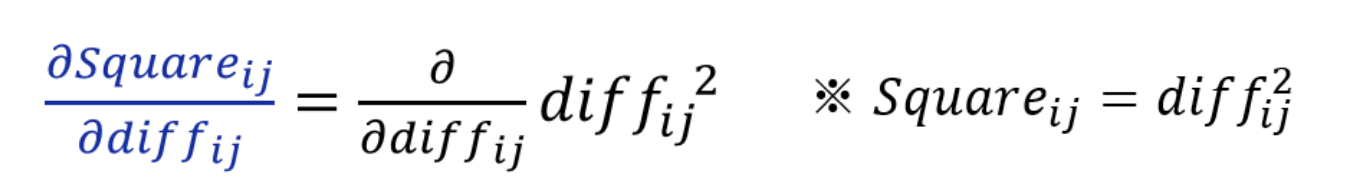

# $$ = 2 × diff$$

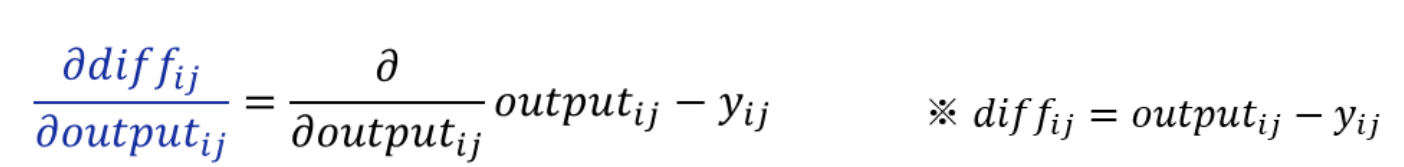

# $$ = 1$$

In [43]:
def backprop_postproc(diff):
    M_N = diff.shape

    g_mse_square  = np.ones(M_N) / np.prod(M_N)
    g_square_diff = 2 * diff 
    g_diff_output = 1

    G_diff   = g_mse_square * g_square_diff
    G_output = g_diff_output * G_diff

    return G_output

In [46]:
def run_train(x, y):
    y_hat, aux_nn_x   = forward_neuralnet(x)
    loss, aux_pp_diff = forward_postproc(y_hat, y)

    accuracy = eval_accuracy(y_hat, y)

    G_output = backprop_postproc(aux_pp_diff)
    backprop_neuralnet(G_output, aux_nn_x)

    return loss, accuracy

In [47]:
def run_test(x, y):
    y_hat, _ = forward_neuralnet(x)
    accuracy = eval_accuracy(y_hat, y)

    return accuracy

In [59]:
weight_initial, bias_initial, losses_mean_row, accs_mean_row, final_acc = main_execute(epoch_count = 10,
                                                                                       mb_size = 32, 
                                                                                       report = 1, 
                                                                                       train_ratio = 0.7)

Initial Weight Value : 
[[ 0.03951745]
 [ 0.00020104]
 [ 0.00330737]
 [ 0.00670813]
 [ 0.01129476]
 [ 0.02770107]
 [ 0.00739104]
 [-0.03645343]
 [-0.01499832]
 [ 0.01971114]]
Initial Bias Value : 
[0.]
Epoch 1 : Train - Loss = 8.795, Accuracy = 0.795  / Test - Accuracy = 0.812
Epoch 2 : Train - Loss = 6.571, Accuracy = 0.813  / Test - Accuracy = 0.801
Epoch 3 : Train - Loss = 6.369, Accuracy = 0.815  / Test - Accuracy = 0.807
Epoch 4 : Train - Loss = 6.251, Accuracy = 0.816  / Test - Accuracy = 0.805
Epoch 5 : Train - Loss = 6.098, Accuracy = 0.819  / Test - Accuracy = 0.810
Epoch 6 : Train - Loss = 5.956, Accuracy = 0.821  / Test - Accuracy = 0.801
Epoch 7 : Train - Loss = 5.858, Accuracy = 0.822  / Test - Accuracy = 0.811
Epoch 8 : Train - Loss = 5.796, Accuracy = 0.824  / Test - Accuracy = 0.804
Epoch 9 : Train - Loss = 5.686, Accuracy = 0.825  / Test - Accuracy = 0.823
Epoch 10 : Train - Loss = 5.614, Accuracy = 0.827  / Test - Accuracy = 0.817
=================================== F

In [58]:
print("weight : \n", weight)
print("bias : \n", bias)

weight : 
 [[  1.18862671]
 [  1.11427864]
 [  0.34421801]
 [ -0.17596663]
 [  8.8902201 ]
 [ 19.37761808]
 [  8.99438172]
 [-19.37954144]
 [-10.77468883]
 [  8.22479831]]
bias : 
 [2.66184569]


In [60]:
print("weight : \n", weight)
print("bias : \n", bias)

weight : 
 [[ 1.69581297]
 [ 1.9023003 ]
 [ 0.5554937 ]
 [ 3.25679664]
 [ 3.09426344]
 [ 1.8821502 ]
 [ 2.66095795]
 [-6.08693535]
 [-0.24981387]
 [ 5.54626459]]
bias : 
 [4.11058111]


In [61]:
new_x = [0, 1, 0, 0.685,0.545, 0.18,1.42,0.674,0.392,0.5]

In [64]:
pred_y, _ = forward_neuralnet(new_x)
print("pred_y : ", pred_y)

pred_y = forward_neuralnet(new_x)
print("pred_y : ", pred_y[0])

pred_y :  [12.62011884]
pred_y :  [12.62011884]


In [65]:
import matplotlib.pyplot as plt


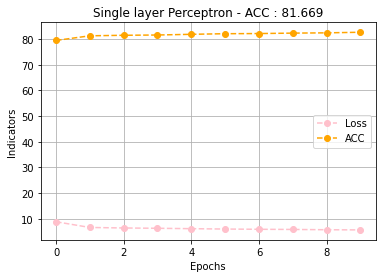

In [66]:
plt.plot(losses_mean_row, '--o', color = 'pink', label = 'Loss')
plt.plot(accs_mean_row, '--o', color = 'orange', label = 'ACC')

plt.title("Single layer Perceptron - ACC : {:.3f}".\
          format(final_acc * 100))

plt.xlabel('Epochs')
plt.ylabel('Indicators')
plt.grid()
plt.legend()

plt.show()

In [ ]:
losses_mean_row, accs_mean_row, final_acc